# **AIN 214 - PA2 - FALL 2024**


**Name Surname**   : FURKAN NECATİ İNAN


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 08.11.2024 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>

# **Necessary Imports**

In [410]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pandas as pd

# **PART- 1**

**Set of Questions on Healthcare Management System (60 Pts)**



For this part, you will use a dataset related to a Healthcare Management System. The dataset includes information about patients, doctors, medical procedures, and healthcare operations.



* **Patients**: There are many patients within the healthcare system. The system holds details that help identify the patient, such as the name and email of the patient receiving medical care.

* **Doctors**: Profiles of healthcare professionals within the facility are stored. Each record provides information about the doctor's identity, including name, specialty and contact information, which is crucial for directing patients to appropriate medical services and ensuring effective communication.

* **Appointments**: Tracks all scheduled visits between patients and doctors and serves as a vital component of the health management system. It keeps records of the appointment date and time, the patient and doctor involved and plays a critical role in managing patient flow and optimizing the use of healthcare resources.

* **Medical Procedures**: It is necessary to catalog the various treatments and diagnostic services offered by the healthcare facility. It is essential to provide clarity on the types of medical interventions available, which aids both clinical and financial planning.

* **Billing**: It is important to record all financial transactions related to patient appointments and procedures. It keeps track of the items billed to patients along with their respective amounts, which is crucial for the financial health of the health facility, allowing for accurate monitoring of income and outstanding balances.


This dataset will be used to design a relational database for managing healthcare operations, which includes data about patients, doctors, appointments, and more. Your task is to build an efficient database schema and write SQL queries.

---


**Dataset Path:** "Data/Appointments_procedures.csv, Patient_billing.csv , Doctors.csv"
  
---

**Note:** Use sqite3 python package for DB

---

# **Q1**. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

\<**your design here**\>




---


# **Database Design**

---

### **patients Table**

| Column   | Type    | Key       | Description                  |
|----------|---------|-----------|------------------------------|
| PatientID| INTEGER | PK        | Unique identifier for patient|
| firstname| TEXT    |           | First name of the patient    |
| lastname | TEXT    |           | Last name of the patient     |
| email    | TEXT    |           | Email address of the patient |

---

### **doctors Table**

| Column       | Type    | Key       | Description                        |
|--------------|---------|-----------|------------------------------------|
| DoctorID     | INTEGER | PK        | Unique identifier for doctor       |
| DoctorName   | TEXT    |           | Name of the doctor                 |
| Specialization | TEXT  |           | Specialization of the doctor       |
| DoctorContact| TEXT    |           | Contact information for the doctor |

---

### **appointments Table**

| Column        | Type    | Key       | Description                           |
|---------------|---------|-----------|---------------------------------------|
| AppointmentID | INTEGER | PK        | Unique identifier for appointment     |
| Date          | TEXT    |           | Date of the appointment               |
| Time          | TEXT    |           | Time of the appointment               |
| PatientID     | INTEGER | FK        | Identifier for the patient            |
| DoctorID      | INTEGER | FK        | Identifier for the doctor             |
| ProcedureID   | INTEGER |           | Identifier for the procedure          |
| ProcedureName | TEXT    |           | Name of the procedure                 |
| FOREIGN KEY (PatientID) REFERENCES patients(PatientID) | | |  |
| FOREIGN KEY (DoctorID) REFERENCES doctors(DoctorID)   | | |  |

---

### **billing Table**

| Column   | Type    | Key       | Description                      |
|----------|---------|-----------|----------------------------------|
| InvoiceID| INTEGER | PK        | Unique identifier for invoice    |
| PatientID| INTEGER | FK        | Identifier for the patient       |
| Items    | TEXT    |           | Items billed to the patient      |
| Amount   | REAL    |           | Billing amount                   |
| FOREIGN KEY (PatientID) REFERENCES patients(PatientID) | | |  |

---

### **medical_procedures Table**

| Column       | Type    | Key       | Description                      |
|--------------|---------|-----------|----------------------------------|
| ProcedureID  | INTEGER | PK        | Unique identifier for procedure  |
| ProcedureName| TEXT    |           | Name of the procedure            |
| AppointmentID     | INTEGER | FK        | Identifier for the appointment        |
| FOREIGN KEY (AppointmentID) REFERENCES appointments(AppointmentID) | | |  |






In [414]:


connection = sqlite3.connect('health_system.db')
cursor = connection.cursor()

appointments_df = pd.read_csv('Data/Appointments_procedures.csv')
billing_df = pd.read_csv('Data/Patient_billing.csv')
doctors_df = pd.read_csv('Data/Doctors.csv')

cursor.execute("DROP TABLE IF EXISTS patients")
cursor.execute("DROP TABLE IF EXISTS doctors")
cursor.execute("DROP TABLE IF EXISTS appointments")
cursor.execute("DROP TABLE IF EXISTS billing")
cursor.execute("DROP TABLE IF EXISTS medical_procedures")

cursor.execute("""
CREATE TABLE IF NOT EXISTS patients (
    PatientID INTEGER PRIMARY KEY,
    firstname TEXT NOT NULL,
    lastname TEXT NOT NULL,
    email TEXT
)
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS doctors (
    DoctorID INTEGER PRIMARY KEY,
    DoctorName TEXT NOT NULL,
    Specialization TEXT NOT NULL,
    DoctorContact TEXT
)
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS appointments (
    AppointmentID INTEGER PRIMARY KEY,
    Date TEXT NOT NULL,
    Time TEXT,
    PatientID INTEGER,
    DoctorID INTEGER,
    ProcedureID INTEGER,
    ProcedureName TEXT,
    FOREIGN KEY(PatientID) REFERENCES patients(PatientID),
    FOREIGN KEY(DoctorID) REFERENCES doctors(DoctorID)
)
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS billing (
    InvoiceID INTEGER PRIMARY KEY,
    PatientID INTEGER,
    Items TEXT,
    Amount REAL NOT NULL,
    FOREIGN KEY(PatientID) REFERENCES patients(PatientID)
)
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS medical_procedures (
    ProcedureID INTEGER PRIMARY KEY,
    ProcedureName TEXT NOT NULL,
    AppointmentID INTEGER,
    FOREIGN KEY(AppointmentID) REFERENCES appointments(AppointmentID)
)
""")

patients_df = billing_df[['PatientID', 'firstname', 'lastname', 'email']].drop_duplicates()
patients_df.to_sql('patients', connection, if_exists='replace', index=False)

doctors_df.to_sql('doctors', connection, if_exists='replace', index=False)
appointments_df.to_sql('appointments', connection, if_exists='replace', index=False)
billing_df.to_sql('billing', connection, if_exists='replace', index=False)

connection.close()


# **Q2**.  Write a SQL query that retrieves the top 5 doctors based on the total number of appointments they have conducted. The results should include each doctor's doctor_id, doctor_name, and the corresponding total_appointments they have handled.(10 Points)

In [416]:
connection = sqlite3.connect('health_system.db')

cursor = connection.cursor()

cursor.execute("""
SELECT Doctors.doctorID, Doctors.DoctorName as doctorName, COUNT(Appointments.appointmentID) as total_appointments
FROM Appointments
JOIN Doctors ON Appointments.doctorID = Doctors.doctorID
GROUP BY Doctors.doctorID
ORDER BY total_appointments DESC
LIMIT 5
""")

results = cursor.fetchall()

for row in results:
    print(f"Doctor ID: {row[0]}, Doctor Name: {row[1]}, Total Appointments: {row[2]}")
connection.close()


Doctor ID: 548, Doctor Name: Karlee, Total Appointments: 6
Doctor ID: 925, Doctor Name: Hyacinthe, Total Appointments: 5
Doctor ID: 637, Doctor Name: Lorenza, Total Appointments: 5
Doctor ID: 527, Doctor Name: Cristabel, Total Appointments: 5
Doctor ID: 417, Doctor Name: Molli, Total Appointments: 5


# **Q3**.  Calculates the total billing amount for each patient. The output should present each patient's patient_id, first_name, last_name, and the total_billed_amount. List the amount of the bill in descending order.(10 Points)

In [418]:
connection = sqlite3.connect('health_system.db')

cursor = connection.cursor()

cursor.execute("""
SELECT patients.patientID, patients.firstname, patients.lastname, SUM(billing.amount) AS total_billing
FROM patients
JOIN billing ON billing.PatientID = patients.patientID
GROUP BY patients.patientID, patients.firstname, patients.lastname
ORDER BY total_billing DESC
""")
results = cursor.fetchall()



for row in results:
    print(f"Patient ID: {row[0]}, Firstname: {row[1]}, Lastname: {row[2]}, Total Billing: {row[3]}")



connection.close()


Patient ID: 733, Firstname: Lesly, Lastname: Arquit, Total Billing: 4035149
Patient ID: 368, Firstname: Stephanie, Lastname: Agle, Total Billing: 3436703
Patient ID: 779, Firstname: Candi, Lastname: Shaver, Total Billing: 3283643
Patient ID: 240, Firstname: Margette, Lastname: Belldas, Total Billing: 2800003
Patient ID: 242, Firstname: Frieda, Lastname: Bonilla, Total Billing: 2286000
Patient ID: 879, Firstname: Mildrid, Lastname: Bakerman, Total Billing: 2285920
Patient ID: 373, Firstname: Asia, Lastname: Bendick, Total Billing: 2281671
Patient ID: 804, Firstname: Madelle, Lastname: Camden, Total Billing: 2219170
Patient ID: 566, Firstname: Rebeca, Lastname: Winnick, Total Billing: 2213831
Patient ID: 546, Firstname: Aimil, Lastname: Suzetta, Total Billing: 2173939
Patient ID: 744, Firstname: Averyl, Lastname: Hutchison, Total Billing: 2150565
Patient ID: 291, Firstname: Roz, Lastname: Oster, Total Billing: 2058340
Patient ID: 448, Firstname: Wendi, Lastname: Gilmour, Total Billing: 2

# **Q4**. Write a SQL query to find the most common medical procedures for every doctor. The result should include the doctor_id, doctor_name, procedure_name, and the count of how many times each procedure has been performed (procedure_count). (10 Points)

In [420]:
# your code here
connection = sqlite3.connect('health_system.db')

cursor = connection.cursor()

cursor.execute("""
SELECT doctors.doctorID, doctors.DoctorName, appointments.ProcedureName, COUNT(appointments.ProcedureID) AS procedure_count
FROM doctors
LEFT JOIN appointments ON doctors.DoctorID = appointments.DoctorID
GROUP BY doctors.doctorID, doctors.DoctorName
ORDER BY procedure_count DESC
""")
results = cursor.fetchall()


for row in results:
    print(f"Doctor ID: {row[0]}, Doctor Name: {row[1]}, Procedure Count: {row[2]}, Procedure Count: {row[3]} ")


connection.close()


Doctor ID: 548, Doctor Name: Karlee, Procedure Count: Colonoscopy, Procedure Count: 6 
Doctor ID: 417, Doctor Name: Molli, Procedure Count: Lumbar puncture, Procedure Count: 5 
Doctor ID: 527, Doctor Name: Cristabel, Procedure Count: Pacemaker implantation, Procedure Count: 5 
Doctor ID: 637, Doctor Name: Lorenza, Procedure Count: Angioplasty and stent placement, Procedure Count: 5 
Doctor ID: 925, Doctor Name: Hyacinthe, Procedure Count: General health check-ups, Procedure Count: 5 
Doctor ID: 197, Doctor Name: Ofilia, Procedure Count: General anesthesia for surgeries, Procedure Count: 4 
Doctor ID: 542, Doctor Name: Sandie, Procedure Count: Rhinoplasty, Procedure Count: 4 
Doctor ID: 617, Doctor Name: Charissa, Procedure Count: Chronic disease management, Procedure Count: 4 
Doctor ID: 688, Doctor Name: Constance, Procedure Count: Thyroid biopsy, Procedure Count: 4 
Doctor ID: 744, Doctor Name: Lolita, Procedure Count: Immunizations, Procedure Count: 4 
Doctor ID: 117, Doctor Name: K

# **Q5**. Calculate the total revenue generated by each doctor from the procedures they have performed. The output should display the doctor_id, first_name and the total revenue (total_revenue) attributed to each doctor. (10 Points)

In [422]:
# your code here

connection = sqlite3.connect('health_system.db')

cursor = connection.cursor()

cursor.execute("""
SELECT doctors.doctorID, doctors.DoctorName, SUM(billing.Amount) AS total_revenue
FROM doctors
JOIN appointments ON doctors.DoctorID = appointments.DoctorID
JOIN billing ON appointments.PatientID = billing.PatientID
GROUP BY doctors.doctorID, doctors.DoctorName

""")
results = cursor.fetchall()

for row in results:
    print(f"Doctor ID: {row[0]}, Doctor Name: {row[1]}, Total Revenue: {row[2]}")


connection.close()








Doctor ID: 101, Doctor Name: Mireielle, Total Revenue: 545986
Doctor ID: 117, Doctor Name: Karena, Total Revenue: 1118905
Doctor ID: 120, Doctor Name: Lilith, Total Revenue: 144746
Doctor ID: 129, Doctor Name: Aurelie, Total Revenue: 2286000
Doctor ID: 155, Doctor Name: Alleen, Total Revenue: 114657
Doctor ID: 165, Doctor Name: Monika, Total Revenue: 699000
Doctor ID: 181, Doctor Name: Britte, Total Revenue: 865126
Doctor ID: 183, Doctor Name: Shauna, Total Revenue: 1485334
Doctor ID: 189, Doctor Name: Max, Total Revenue: 6567286
Doctor ID: 191, Doctor Name: Britte, Total Revenue: 475014
Doctor ID: 197, Doctor Name: Ofilia, Total Revenue: 3172966
Doctor ID: 203, Doctor Name: Kore, Total Revenue: 118150
Doctor ID: 219, Doctor Name: Estell, Total Revenue: 756533
Doctor ID: 222, Doctor Name: Zia, Total Revenue: 144135
Doctor ID: 224, Doctor Name: Dorene, Total Revenue: 2479084
Doctor ID: 237, Doctor Name: Suzette, Total Revenue: 3580216
Doctor ID: 243, Doctor Name: Edith, Total Revenue: 3

# **Q6.** Identify patients who have had multiple appointments. The query should return the patient_id, first_name, last_name, and appointment_count. List the appointment_count in descending order. (10 Points)

In [424]:
# your code here

connection = sqlite3.connect('health_system.db')

cursor = connection.cursor()

cursor.execute("""
SELECT patients.patientID, patients.firstname, patients.lastname, COUNT(*) AS appointment_count
FROM patients
JOIN appointments ON patients.patientID = appointments.patientID
GROUP BY patients.patientID, patients.firstname, patients.lastname
ORDER BY appointment_count DESC
""")
results = cursor.fetchall()


for row in results:
    print(f"Patient ID: {row[0]}, Firstname: {row[1]}, Lastname: {row[2]}, Appointment Count: {row[3]}")



connection.close()

Patient ID: 870, Firstname: Carolina, Lastname: Carbo, Appointment Count: 6
Patient ID: 368, Firstname: Stephanie, Lastname: Agle, Appointment Count: 5
Patient ID: 469, Firstname: Ashlee, Lastname: Annabella, Appointment Count: 5
Patient ID: 613, Firstname: Zia, Lastname: Wildermuth, Appointment Count: 5
Patient ID: 696, Firstname: Grier, Lastname: Noam, Appointment Count: 5
Patient ID: 149, Firstname: Drucie, Lastname: Nedrud, Appointment Count: 4
Patient ID: 190, Firstname: Amara, Lastname: Sawtelle, Appointment Count: 4
Patient ID: 381, Firstname: Chickie, Lastname: Hazlett, Appointment Count: 4
Patient ID: 717, Firstname: Tybie, Lastname: Latini, Appointment Count: 4
Patient ID: 977, Firstname: Carree, Lastname: Bach, Appointment Count: 4
Patient ID: 260, Firstname: Brynna, Lastname: Ahab, Appointment Count: 3
Patient ID: 281, Firstname: Marguerite, Lastname: Silvan, Appointment Count: 3
Patient ID: 339, Firstname: Mellicent, Lastname: Viddah, Appointment Count: 3
Patient ID: 404, 

# **PART- 2**

**Set of Questions : DATA ANALYSIS WITH VISUALIZATION TOOLS** **(40 Pts)**

Answer the following questions, using visualization tools, and comment on your work.

---

**Dataset Path**: "Data/Suicides.csv"

---



# **Q1.** Create a pivot table showing the average suicide rate by country and year.  Which countries have the highest and lowest average suicide rates over the years? Analyze the data using this graph.(8 Points)

Highest average suicide rate is: Lithuania
Lowest average suicide rate is: Dominica


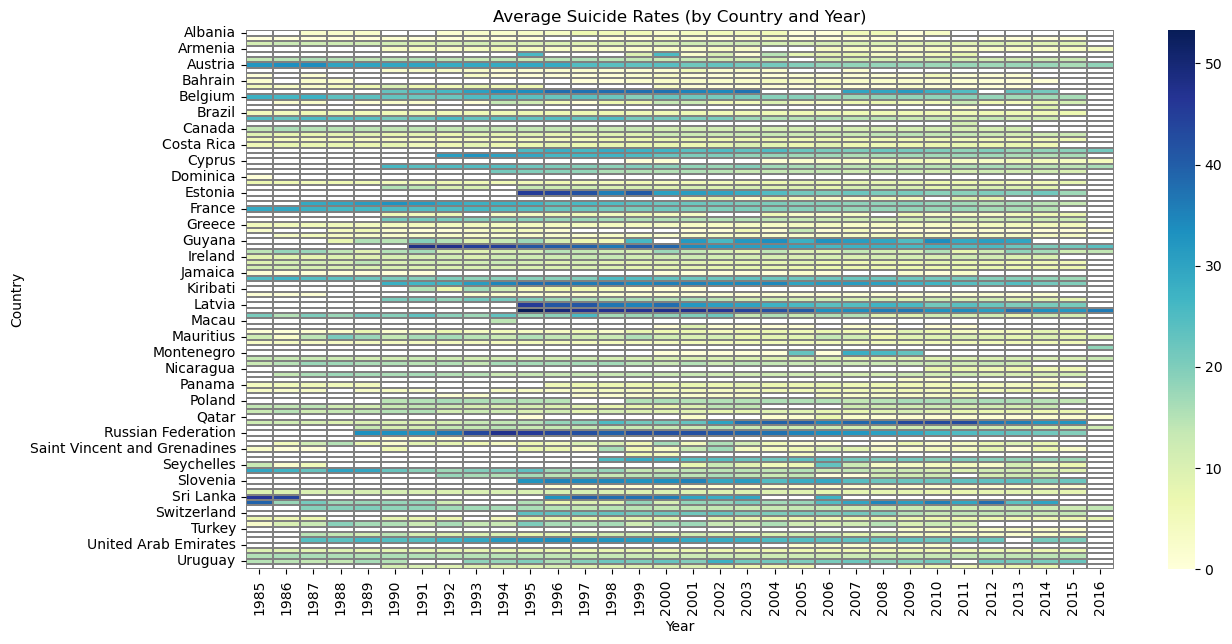

In [427]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Data/Suicides.csv")

pivot_table = data.pivot_table(values='suicides/100k pop', index='country', columns='year', aggfunc='mean')

average_suicide_rates = pivot_table.mean(axis=1)
highest_rate_country = average_suicide_rates.idxmax()
lowest_rate_country = average_suicide_rates.idxmin()

print(f"Highest average suicide rate is: {highest_rate_country}")
print(f"Lowest average suicide rate is: {lowest_rate_country}")

plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap="YlGnBu", linecolor='gray', linewidths=0.1)
plt.title("Average Suicide Rates (by Country and Year)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()


# **Q2**. Create a histogram to visualize the distribution of suicide rates. What is the most common range of suicide rates across countries? Comment on the findings about this graph.(8 Points)

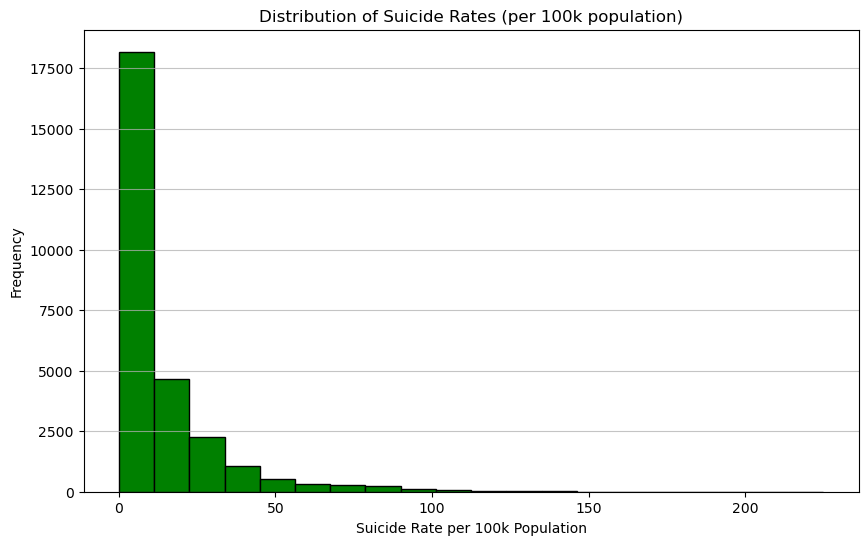

In [429]:
plt.figure(figsize=(10, 6))
plt.hist(data['suicides/100k pop'], bins=20, color='green', edgecolor='black')
plt.title("Distribution of Suicide Rates (per 100k population)")
plt.xlabel("Suicide Rate per 100k Population")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


# **Q3**. Using a pie chart , show the proportion of total suicides by gender for the most recent year available in the dataset. How do suicide rates differ between genders? Comment about your findings. (8 Points)

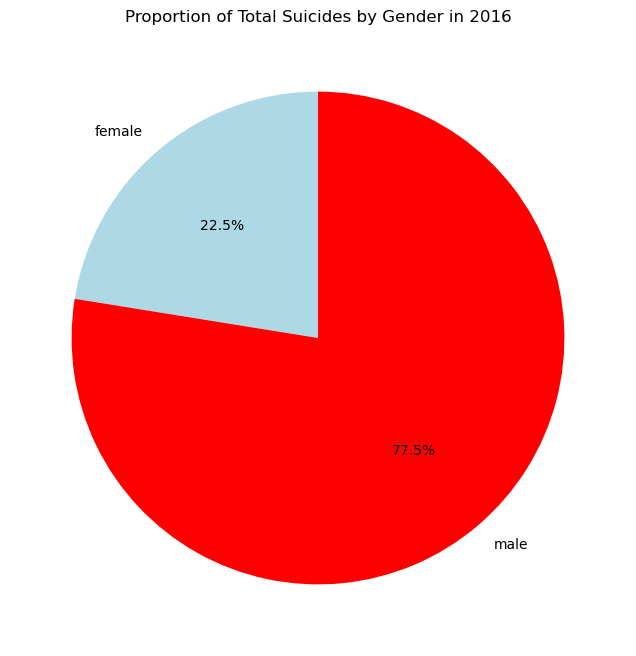

In [431]:
# your code here
most_recent_year = data['year'].max()

recent_data = data[data['year'] == most_recent_year]

suicides_by_gender = recent_data.groupby('sex')['suicides_no'].sum()


plt.figure(figsize=(8, 8))
plt.pie(suicides_by_gender, labels=suicides_by_gender.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'red'])
plt.title(f"Proportion of Total Suicides by Gender in {most_recent_year}")
plt.show()

# **Q4**. Create a scatter plot showing the relationship between GDP per capita and suicide rate. Is there a correlation between a country's wealth (GDP per capita) and its suicide rates? Comment on any correlations or patterns you observe.(8 Points)

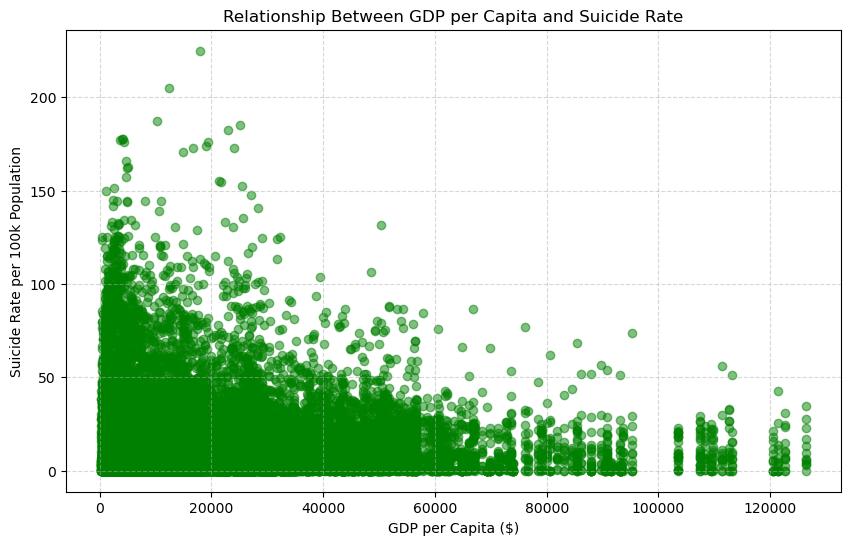

In [433]:
# your code here
plt.figure(figsize=(10, 6))
plt.scatter(data['gdp_per_capita ($)'], data['suicides/100k pop'], alpha=0.5, color='green')
plt.title("Relationship Between GDP per Capita and Suicide Rate")
plt.xlabel("GDP per Capita ($)")
plt.ylabel("Suicide Rate per 100k Population")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# **Q5.** Using  a bar chart, illustrating the top 10 countries with the highest suicide rates. Comment about the findings from this graph. (8 Points)

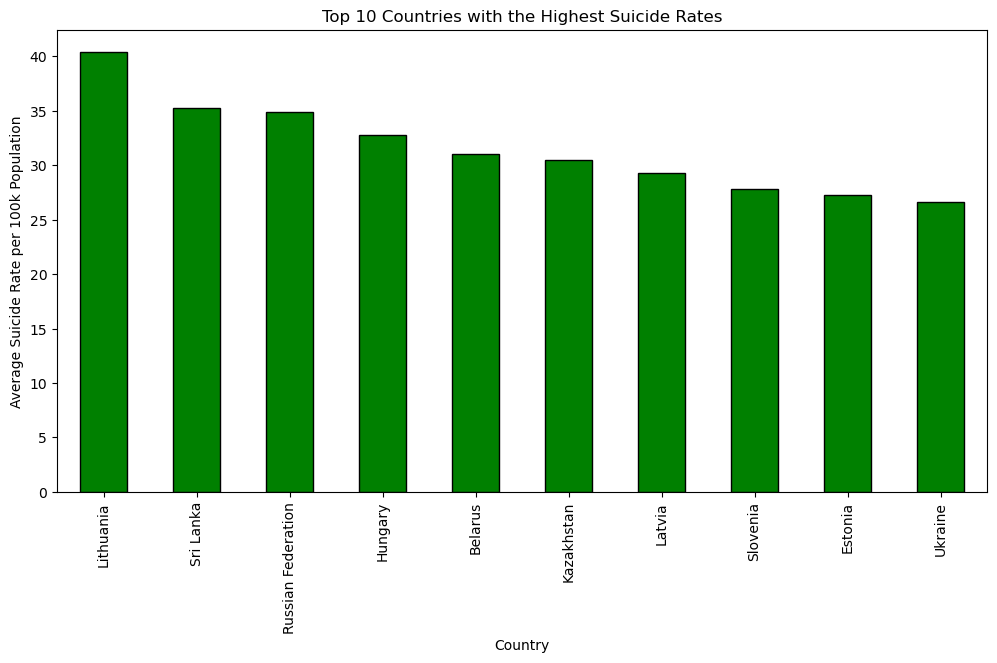

In [435]:
# your code here
average_suicide_rate_by_country = data.groupby('country')['suicides/100k pop'].mean().sort_values(ascending=False)

top_10_countries = average_suicide_rate_by_country.head(10)

plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='green', edgecolor='black')
plt.title("Top 10 Countries with the Highest Suicide Rates")
plt.xlabel("Country")
plt.ylabel("Average Suicide Rate per 100k Population")
plt.xticks(rotation=90)
plt.show()

# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw2.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.